In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller,kpss



In [31]:
data = pd.read_csv('./임시.csv', encoding='utf-8-sig')
data = data.drop(['일시','품종'],axis=1)
print(data.dtypes)

위판중량(kg)       float64
평균 풍속(m/s)     float64
평균기압(hPa)      float64
평균 상대습도(%)     float64
평균 기온(°C)      float64
평균 수온(°C)      float64
평균 최대 파고(m)    float64
평균 유의 파고(m)    float64
평균 파주기(sec)    float64
WTI            float64
dtype: object


In [32]:
#ADF검정
## UDF for ADF test
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [33]:
data1 = data.dropna()
for i in data1.columns:
    print('column :',i)
    adf_test(data1[str(i)])
print('WTI를 제외한 모든 컬럼은 정상 시계열이다')

column : 위판중량(kg)
Results of Dickey-Fuller Test:
Test Statistic                -6.114035e+00
p-value                        9.186047e-08
#Lags Used                     2.800000e+01
Number of Observations Used    3.684000e+03
Critical Value (1%)           -3.432126e+00
Critical Value (5%)           -2.862325e+00
Critical Value (10%)          -2.567188e+00
dtype: float64
column : 평균 풍속(m/s)
Results of Dickey-Fuller Test:
Test Statistic                -6.545964e+00
p-value                        9.098118e-09
#Lags Used                     2.300000e+01
Number of Observations Used    3.689000e+03
Critical Value (1%)           -3.432124e+00
Critical Value (5%)           -2.862324e+00
Critical Value (10%)          -2.567187e+00
dtype: float64
column : 평균기압(hPa)
Results of Dickey-Fuller Test:
Test Statistic                   -4.245314
p-value                           0.000552
#Lags Used                       14.000000
Number of Observations Used    3698.000000
Critical Value (1%)             

In [35]:
## UDF for KPSS test
from statsmodels.tsa.stattools import kpss
import pandas as pd

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [36]:
for i in data1.columns:
    print('column :',i)
    kpss_test(data1[str(i)])

column : 위판중량(kg)
Results of KPSS Test:
Test Statistic            0.207081
p-value                   0.100000
Lags Used                33.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
column : 평균 풍속(m/s)
Results of KPSS Test:
Test Statistic            0.491954
p-value                   0.043479
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
column : 평균기압(hPa)
Results of KPSS Test:
Test Statistic            0.045288
p-value                   0.100000
Lags Used                36.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
column : 평균 상대습도(%)
Results of KPSS Test:
Test Statistic            0.03917
p-value              

c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\admin\anaconda33\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is g

c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda33\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\

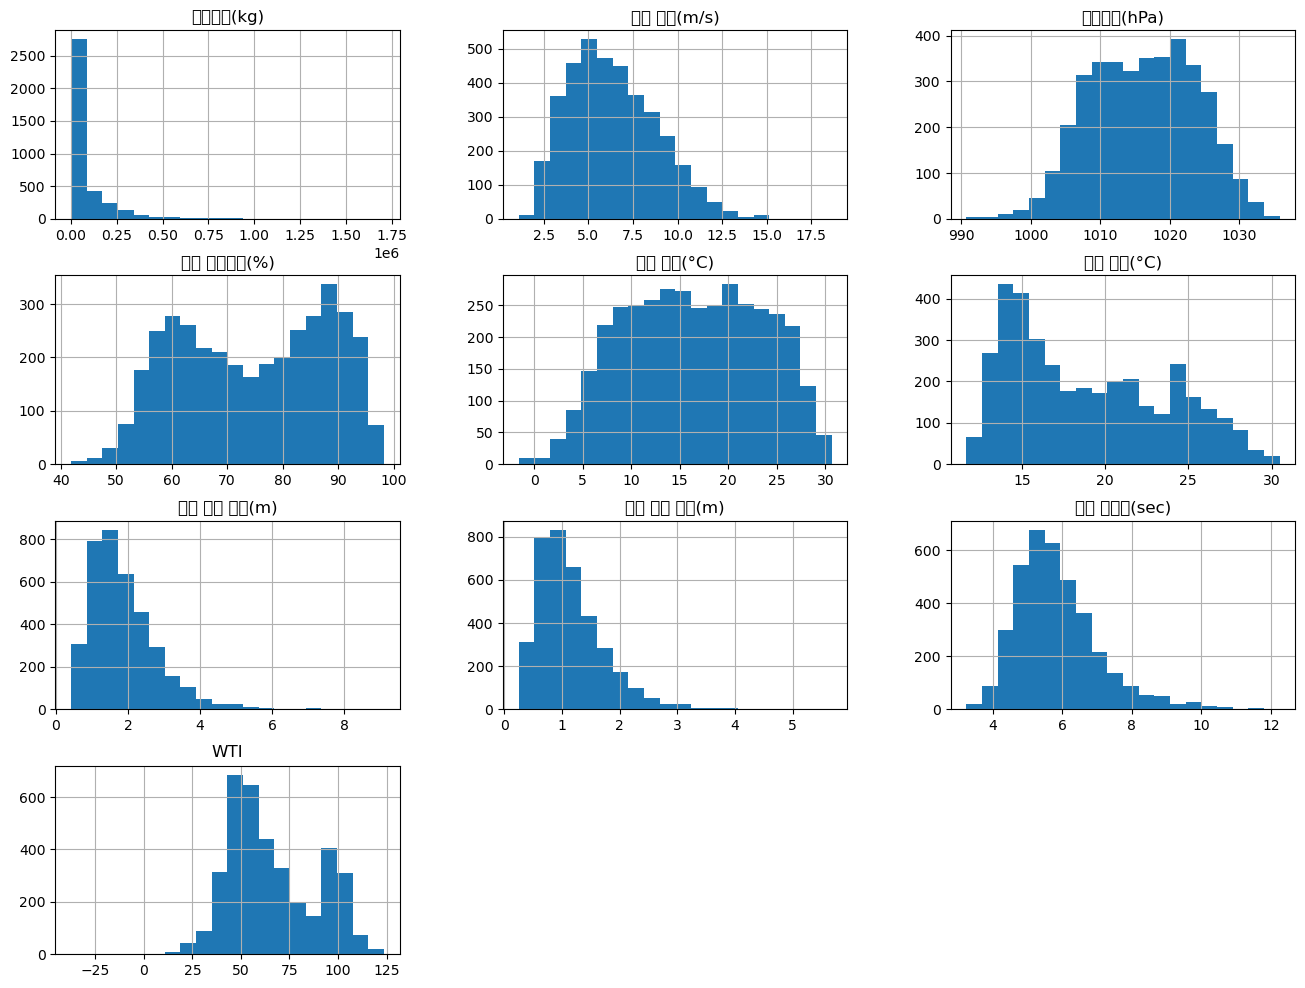

In [37]:
data1.hist(bins=20, grid=True, figsize=(16,12))
plt.show()

KeyError: 1

In [40]:
data.corr().style.background_gradient()

In [45]:
for i in data1.columns[1:]:
    print('column :',i)
    print(data1[data1['위판중량(kg)'],data1[str(i)]].corr(method='pearson'))


column : 평균 풍속(m/s)


KeyError: "None of [Index([(5766.0, 253212.0, 119183.0, 128879.0, 3912.0, 1480.0, 343731.0, 206269.0, 220105.0, 181257.0, 26264.0, 14051.0, 20367.0, 214667.0, 139612.0, 6228.0, 48826.0, 2980.0, 12201.0, 340.0, 175588.0, 144301.0, 292864.0, 174970.0, 42060.0, 7990.0, 5810.0, 82300.0, 53346.0, 10981.0, 893.0, 8559.0, 4225.0, 1845.0, 119891.0, 3251.0, 121214.0, 36176.0, 23424.0, 15642.666666666666, 7861.333333333332, 80.0, 1399.0, 12268.0, 3607.0, 5688.0, 14458.0, 130.0, 105074.0, 129034.0, 35753.0, 2191.0, 376.0, 2644.0, 1105.0, 67611.0, 11829.0, 24595.0, 36367.0, 8812.0, 6048.0, 670.0, 35362.0, 24354.0, 40371.0, 114991.0, 28419.0, 42746.0, 60324.5, 77903.0, 5511.0, 8502.5, 14156.0, 4799.0, 135.0, 455.0, 124672.4, 5968.0, 324.0, 15575.0, 1093.0, 1560.0, 310.0, 19518.0, 45707.0, 5136.0, 6199.0, 5445.0, 931.0, 997.0, 496.0, 7667.0, 2247.0, 23334.0, 4386.0, 2100.0, 315.0, 31238.0, 4896.0, 58394.0, ...), (7.766666666666667, 9.266666666666667, 9.8, 7.133333333333333, 7.366666666666666, 6.6000000000000005, 6.833333333333333, 8.4, 9.833333333333334, 8.866666666666667, 3.6, 4.866666666666666, 7.6, 9.866666666666667, 5.266666666666667, 7.533333333333334, 11.366666666666667, 7.833333333333333, 5.5, 6.383333333333333, 7.8, 8.633333333333333, 8.299999999999999, 8.533333333333333, 9.566666666666666, 8.033333333333333, 10.333333333333334, 5.866666666666667, 4.266666666666667, 4.233333333333333, 6.1000000000000005, 9.9, 9.1, 6.5, 8.166666666666666, 7.8, 9.566666666666666, 10.4, 8.4, 6.5, 7.333333333333333, 6.8, 7.133333333333333, 5.166666666666667, 2.733333333333333, 9.166666666666666, 7.666666666666667, 5.7, 8.333333333333334, 9.866666666666664, 8.133333333333333, 5.766666666666667, 6.566666666666666, 8.033333333333333, 4.666666666666667, 3.8333333333333335, 6.0, 6.766666666666667, 4.8, 11.166666666666666, 10.3, 6.733333333333333, 7.233333333333333, 5.966666666666666, 5.733333333333333, 8.0, 6.4, 5.833333333333333, 10.1, 6.266666666666667, 4.733333333333333, 11.166666666666666, 8.1, 4.633333333333334, 4.433333333333334, 5.233333333333333, 8.266666666666667, 4.8, 7.6, 6.233333333333333, 6.033333333333334, 5.533333333333334, 6.5, 9.8, 4.733333333333333, 3.2, 5.766666666666667, 7.8, 4.933333333333334, 6.366666666666667, 5.833333333333333, 8.799999999999999, 7.7, 5.333333333333333, 7.8, 11.733333333333334, 10.0, 6.4, 9.15, 8.0, ...)], dtype='object')] are in the [columns]"